# Exploración de datos

## Cargue de librerias y parametros

In [1]:
%load_ext autoreload
%autoreload 2

import sys
import os

# Agrega la ruta del directorio 'src' al path
sys.path.append(os.path.abspath('../src'))

# Ahora puedes importar tus módulos
from procesamiento_datos import *
#from data_synthetic import *
#from evaluation import *
#from modeling import *

Función de procesamiento de datos cargadas correctamente.


In [2]:
repo_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
print("Ruta raíz del repositorio:", repo_root)  

Ruta raíz del repositorio: d:\Desarrollo\Repositorios\Modelos_Deterioro_NIIF9


## Cargue de los dataframes

In [3]:
# Definir la ruta a la carpeta 'data/raw'
datos_raw = "..//data/raw/"

# Cargar los datos
df_facturas = cargar_datos(datos_raw + "Historico_Facturas.csv")
df_cierres = cargar_datos(datos_raw + "Historico_Deterioro_ABC.csv")
df_ipc = cargar_datos(datos_raw + "Historico_IPC.csv", sep=';')
df_tasas = cargar_datos(datos_raw + "Historico_Tasas_Credito.csv", sep=';')
df_pib = cargar_datos(datos_raw + "Historico_PIB_Corriente_Desc.csv")
df_sml = cargar_datos(datos_raw + "Historico_Salario_Minimo.csv")

## Revisión Inicial dataframes
---
### df_facturas

In [4]:
# Revisión inicial de los DataFrames
print("\nDataFrame de Facturas:")
revision_inicial(df_facturas)


DataFrame de Facturas:
Primeras filas del DataFrame:


,NIT,id_factura,Fecha_expedicion,Estado,Total factura,Saldo,Fecha_pago,Fecha_vencimiento,Valor_pagado
0,42ee24fec8333f54a4615265bb3b91ce3300fdf90ed8c8...,186537,2025-06-18,CONFIRMADA,1035398.0,1035398.0,NaN,2025-07-18,0.0
1,46f8499a6c67d365a9242127ab7baf8a4e6505f2d4a4a4...,177214,2024-08-28,PAGADA,773500.0,0.0,2024-09-25 00:00:00,2024-09-27,773500.0
2,727ed2c81ecbb468b0239c55c137ebc8515e8977eaf5ca...,161840,2022-11-25,PAGADA,11900000.0,0.0,2024-11-28 00:00:00,2022-12-25,11900000.0
3,c1dad0801a0cf886e273e08c58becbde2fee81c39b7168...,161841,2022-11-25,PAGADA,11900000.0,0.0,2024-08-07 00:00:00,2022-12-25,11900000.0
4,bec32d6c8b8f837ddb1545d7637586ca649e56d895c1ed...,177216,2024-08-28,PAGADA,773500.0,0.0,2025-01-10 00:00:00,2024-09-27,773500.0



Información del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61393 entries, 0 to 61392
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   NIT                61393 non-null  object 
 1   id_factura         61393 non-null  int64  
 2   Fecha_expedicion   61393 non-null  object 
 3   Estado             61393 non-null  object 
 4   Total factura      61393 non-null  float64
 5   Saldo              61393 non-null  float64
 6   Fecha_pago         60546 non-null  object 
 7   Fecha_vencimiento  61393 non-null  object 
 8   Valor_pagado       61393 non-null  float64
dtypes: float64(3), int64(1), object(5)
memory usage: 4.2+ MB
None

Descripción datos categoricos del DataFrame:
                                                      NIT Fecha_expedicion  \
count                                               61393            61393   
unique                                               2927          

In [5]:
#Cambiar el tipo de las columnas 

df_facturas[['Fecha_expedicion', 'Fecha_pago', 'Fecha_vencimiento']] = df_facturas[['Fecha_expedicion', 'Fecha_pago', 'Fecha_vencimiento']].apply(pd.to_datetime, errors='coerce')
df_facturas['id_factura'] = df_facturas['id_factura'].astype(str)

#Reemplazar valores nulos en la columna 'Fecha_pago' con "N/A"
df_facturas['Fecha_pago'].fillna("N/A", inplace=True)

#redondear las columnas numéricas a 2 decimales
columnas_numericas = ['Total factura', 'Saldo', 'Valor_pagado']
for col in columnas_numericas:
    df_facturas[col] = pd.to_numeric(df_facturas[col], errors='coerce').round(2)

# Renombrar columnas para mayor claridad

df_facturas = df_facturas.rename(columns={
    'id_factura': 'numero_factura',
    'NIT': 'id_cliente',
    'Fecha_expedicion': 'fecha_expedicion',
    'Estado': 'estado',
    'Total factura': 'total_factura',
    'Saldo': 'saldo',
    'Fecha_pago': 'fecha_pago',
    'Fecha_vencimiento': 'fecha_vencimiento',
    'Valor_pagado': 'valor_pagado'
})

revision_inicial(df_facturas)

Primeras filas del DataFrame:


C:\Users\danie\AppData\Local\Temp\ipykernel_11576\2579110879.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_facturas['Fecha_pago'].fillna("N/A", inplace=True)
C:\Users\danie\AppData\Local\Temp\ipykernel_11576\2579110879.py:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'N/A' has dtype incompatible with datetime64[ns], please explicitly cast to a compatible dtype first.
  df_facturas['Fecha_pago'].fillna("N/A", inplace=True)


,id_cliente,numero_factura,fecha_expedicion,estado,total_factura,saldo,fecha_pago,fecha_vencimiento,valor_pagado
0,42ee24fec8333f54a4615265bb3b91ce3300fdf90ed8c8...,186537,2025-06-18,CONFIRMADA,1035398.0,1035398.0,N/A,2025-07-18,0.0
1,46f8499a6c67d365a9242127ab7baf8a4e6505f2d4a4a4...,177214,2024-08-28,PAGADA,773500.0,0.0,2024-09-25 00:00:00,2024-09-27,773500.0
2,727ed2c81ecbb468b0239c55c137ebc8515e8977eaf5ca...,161840,2022-11-25,PAGADA,11900000.0,0.0,2024-11-28 00:00:00,2022-12-25,11900000.0
3,c1dad0801a0cf886e273e08c58becbde2fee81c39b7168...,161841,2022-11-25,PAGADA,11900000.0,0.0,2024-08-07 00:00:00,2022-12-25,11900000.0
4,bec32d6c8b8f837ddb1545d7637586ca649e56d895c1ed...,177216,2024-08-28,PAGADA,773500.0,0.0,2025-01-10 00:00:00,2024-09-27,773500.0



Información del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61393 entries, 0 to 61392
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id_cliente         61393 non-null  object        
 1   numero_factura     61393 non-null  object        
 2   fecha_expedicion   61393 non-null  datetime64[ns]
 3   estado             61393 non-null  object        
 4   total_factura      61393 non-null  float64       
 5   saldo              61393 non-null  float64       
 6   fecha_pago         61393 non-null  object        
 7   fecha_vencimiento  61393 non-null  datetime64[ns]
 8   valor_pagado       61393 non-null  float64       
dtypes: datetime64[ns](2), float64(3), object(4)
memory usage: 4.2+ MB
None

Descripción datos categoricos del DataFrame:
                                               id_cliente numero_factura  \
count                                               61393    

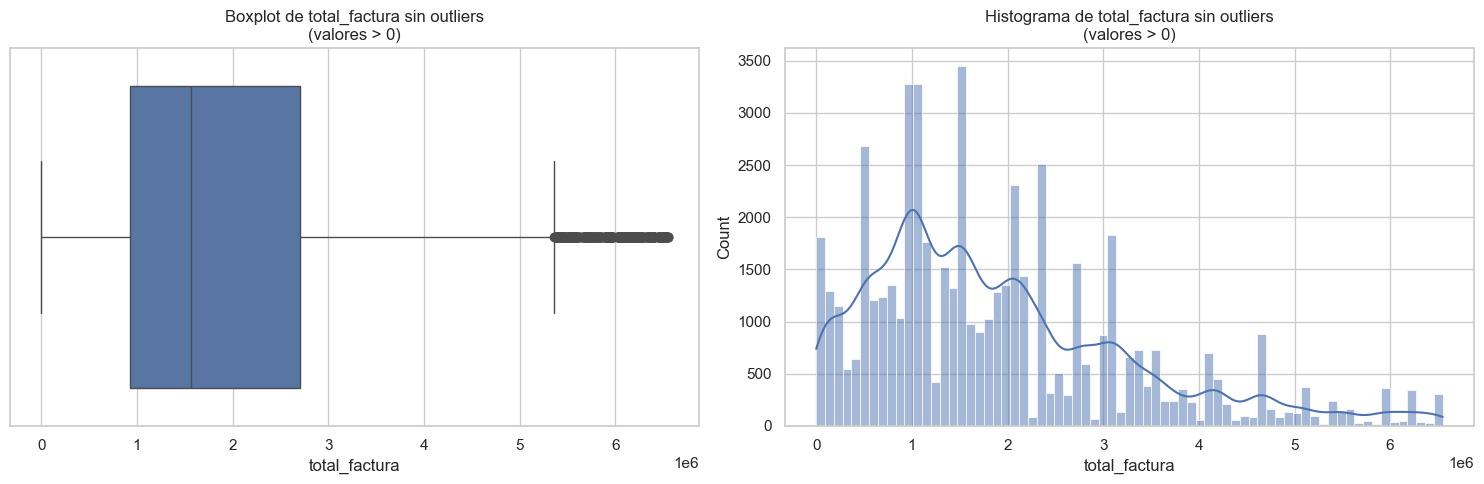

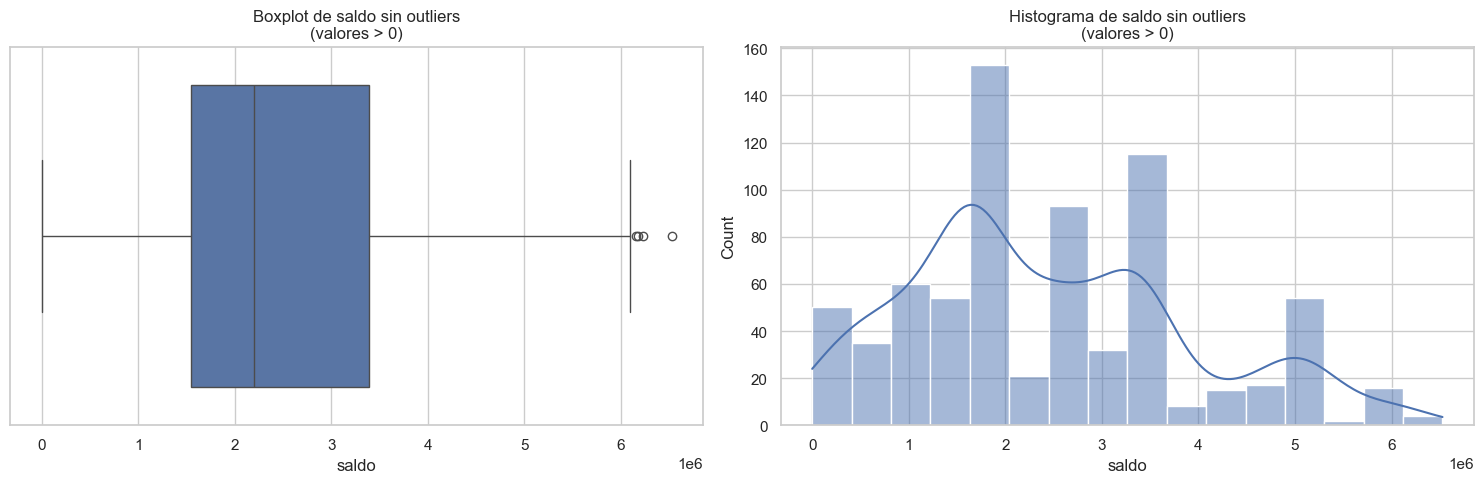

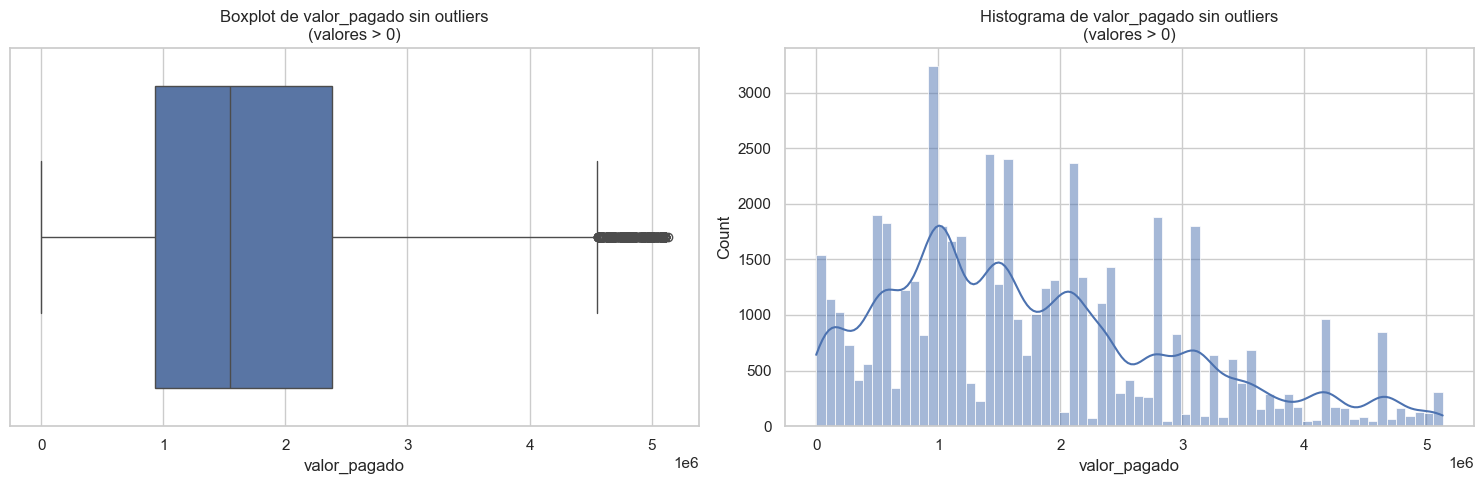

In [6]:
visualizar_distribucion(df_facturas, outliers=False)

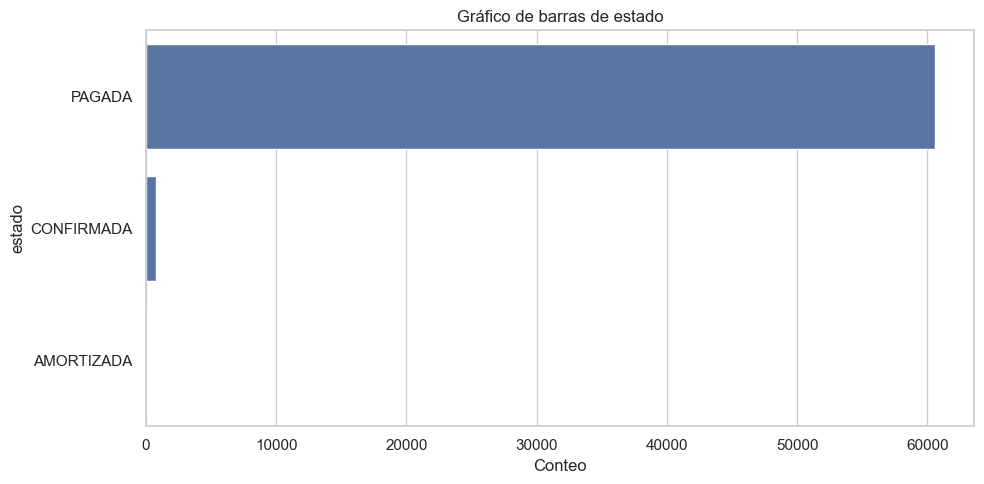

In [7]:
visualizar_categoricas(df_facturas, ['estado'])

### df_cierre

In [8]:
revision_inicial(df_cierres)

Primeras filas del DataFrame:


,Mes informe,NIT,Cliente,Fecha de Vencimiento,Dias de Mora,Calificación,Cuenta Por Cobrar,% de Deterioro T-1,Valor de Deterioro T-1,% de Deterioro,Valor de Deterioro,Diferencias,FID,Fideicomiso
0,202301,bda703a41ee55dcb911f17164009bc87636552bd5a641b...,2fd44f99ebb5f4779baa8f8c3c18b8aa3778395b58c9bf...,15/09/2022,0,A,"2,380,000.00",0.0022,5236,0.0022,5236,0,b527ab75d12cba5a48db8e39b6dc776fafe8d0a64454c1...,ef41b40f72aabddd7491277f62e2d14d7f8126b6c06831...
1,202301,a6fbe7c3a37fa63f96d9ac3efe825deafc3c3d68ec13fe...,ddbb7aaaf540b1d826fe0a1b86d885bce851a6a10b17c1...,28/02/2023,0,A,0.00,0.0022,0,0.0022,0,0,6b86b273ff34fce19d6b804eff5a3f5747ada4eaa22f1d...,c7b36740e4a4084fabf1f8fe801822e3c638dcc964917a...
2,202301,f81197f9f4a967d97235421ba58bbe1e28c3a5eaf0efec...,e7f467d21e1ae519b47b15c10f7de9368ada74e51d0e90...,28/02/2023,0,A,0.00,0.0022,0,0.0022,0,0,eaab7f29f0ebeeb28a5fcae7dba2f7b07bf2fa942bab4b...,f1cb9ef1cdaf60372aaecc67cf18b3e0faaec12172234f...
3,202301,c8ade62397784043d77a93a6884460c5d86843a81f9c26...,e9485dbb84aae5eb13fc27277fe3632c880ce13cf5c847...,28/02/2023,0,A,0.00,0.0022,0,0.0022,0,0,aa6df8861c8ad85418960d463c1bfff2ec9d257d58e5ab...,1fc58270cf6d565f7721f33a604319fd0fed003c975329...
4,202301,22a725be4cbf11a95514f3c8e93885502034dfc44b52a2...,30976b83fed3f372533fa798d28600e70c3afc2db43d26...,28/02/2023,0,A,0.00,0.0022,0,0.0022,0,0,22a725be4cbf11a95514f3c8e93885502034dfc44b52a2...,dfbe8cbeeca35fc3e79319d0ce9094df25966e94cef76b...



Información del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11790 entries, 0 to 11789
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Mes informe              11790 non-null  int64  
 1   NIT                      11790 non-null  object 
 2   Cliente                  11790 non-null  object 
 3   Fecha de Vencimiento     11790 non-null  object 
 4   Dias de Mora             11790 non-null  int64  
 5   Calificación             11790 non-null  object 
 6   Cuenta Por Cobrar        11790 non-null  object 
 7   % de Deterioro T-1       11790 non-null  float64
 8   Valor de Deterioro  T-1  11790 non-null  object 
 9   % de Deterioro           11790 non-null  float64
 10  Valor de Deterioro       11790 non-null  object 
 11  Diferencias              11790 non-null  object 
 12  FID                      11790 non-null  object 
 13  Fideicomiso              11790 non-null  object 

In [9]:

# Eliminar las columnas: 'Cliente', 'Fecha de Vencimiento' y 5 otras columnas
df_cierres = df_cierres.drop(columns=['Cliente', 'Fecha de Vencimiento', '% de Deterioro T-1', 'Valor de Deterioro  T-1', '% de Deterioro', 'Diferencias', 'Fideicomiso'])

# Transform 'Mes informe' to datetime with last day of the month
df_cierres['Mes informe'] = pd.to_datetime(df_cierres['Mes informe'].astype(str), format='%Y%m') + MonthEnd(0)

# Convert 'Cuenta Por Cobrar' and 'Valor de Deterioro' to decimal
df_cierres['Cuenta Por Cobrar'] = df_cierres['Cuenta Por Cobrar'].str.replace(',', '').astype(float)
df_cierres['Valor de Deterioro'] = df_cierres['Valor de Deterioro'].str.replace(',', '').astype(float)

# Cambiar el nombre de la columna 'Mes informe' a 'mes_cierre'
df_cierres = df_cierres.rename(columns={
    'Mes informe': 'mes_cierre',
    'NIT':'id_cliente',
    'Dias de Mora':'dias_mora',
    'Calificación':'calificacion',
    'Cuenta Por Cobrar':'cuenta_cobrar',
    'Valor de Deterioro':'deterioro',
    'FID':'id_negocio'})

revision_inicial(df_cierres)


Primeras filas del DataFrame:


,mes_cierre,id_cliente,dias_mora,calificacion,cuenta_cobrar,deterioro,id_negocio
0,2023-01-31,bda703a41ee55dcb911f17164009bc87636552bd5a641b...,0,A,2380000.0,5236.0,b527ab75d12cba5a48db8e39b6dc776fafe8d0a64454c1...
1,2023-01-31,a6fbe7c3a37fa63f96d9ac3efe825deafc3c3d68ec13fe...,0,A,0.0,0.0,6b86b273ff34fce19d6b804eff5a3f5747ada4eaa22f1d...
2,2023-01-31,f81197f9f4a967d97235421ba58bbe1e28c3a5eaf0efec...,0,A,0.0,0.0,eaab7f29f0ebeeb28a5fcae7dba2f7b07bf2fa942bab4b...
3,2023-01-31,c8ade62397784043d77a93a6884460c5d86843a81f9c26...,0,A,0.0,0.0,aa6df8861c8ad85418960d463c1bfff2ec9d257d58e5ab...
4,2023-01-31,22a725be4cbf11a95514f3c8e93885502034dfc44b52a2...,0,A,0.0,0.0,22a725be4cbf11a95514f3c8e93885502034dfc44b52a2...



Información del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11790 entries, 0 to 11789
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   mes_cierre     11790 non-null  datetime64[ns]
 1   id_cliente     11790 non-null  object        
 2   dias_mora      11790 non-null  int64         
 3   calificacion   11790 non-null  object        
 4   cuenta_cobrar  11790 non-null  float64       
 5   deterioro      11790 non-null  float64       
 6   id_negocio     11790 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 644.9+ KB
None

Descripción datos categoricos del DataFrame:
                                               id_cliente calificacion  \
count                                               11790        11790   
unique                                                809            5   
top     f81197f9f4a967d97235421ba58bbe1e28c3a5eaf

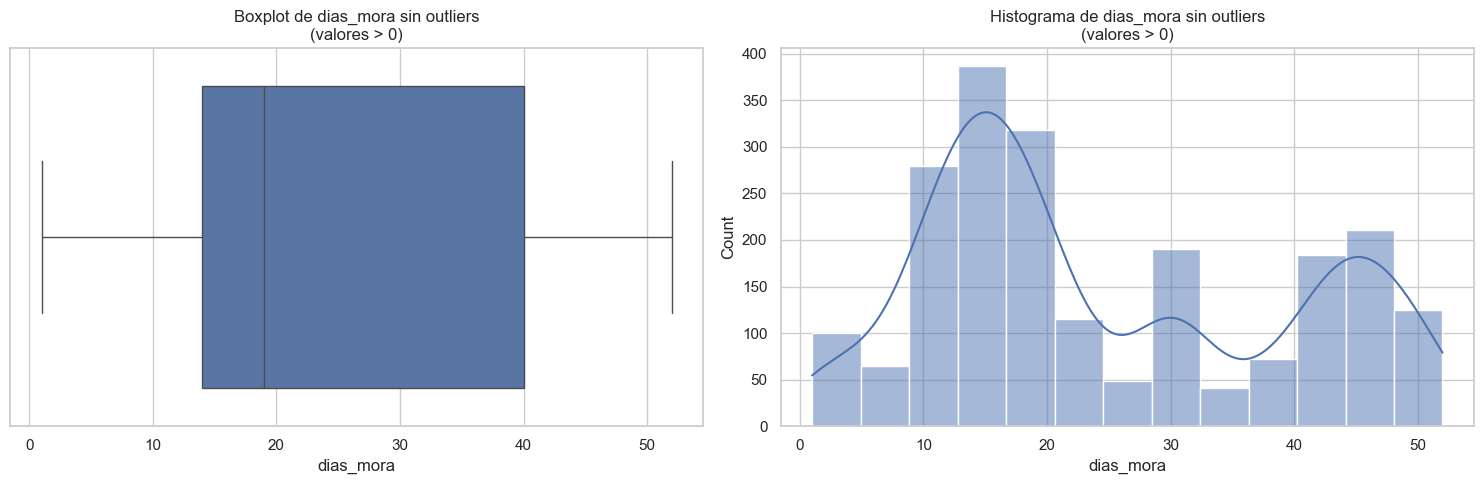

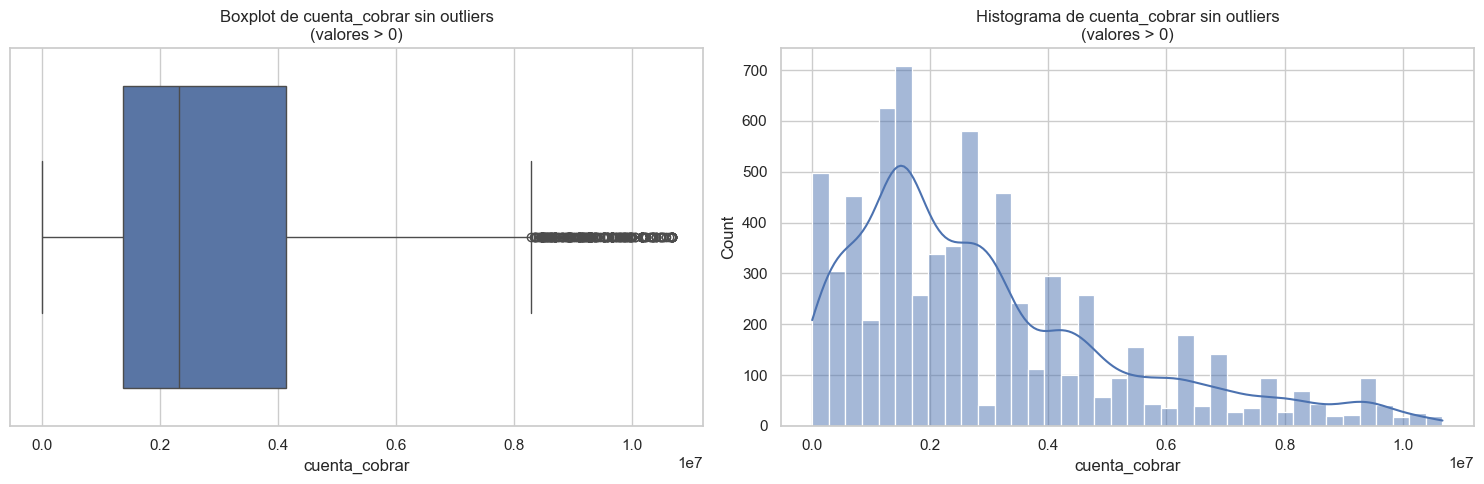

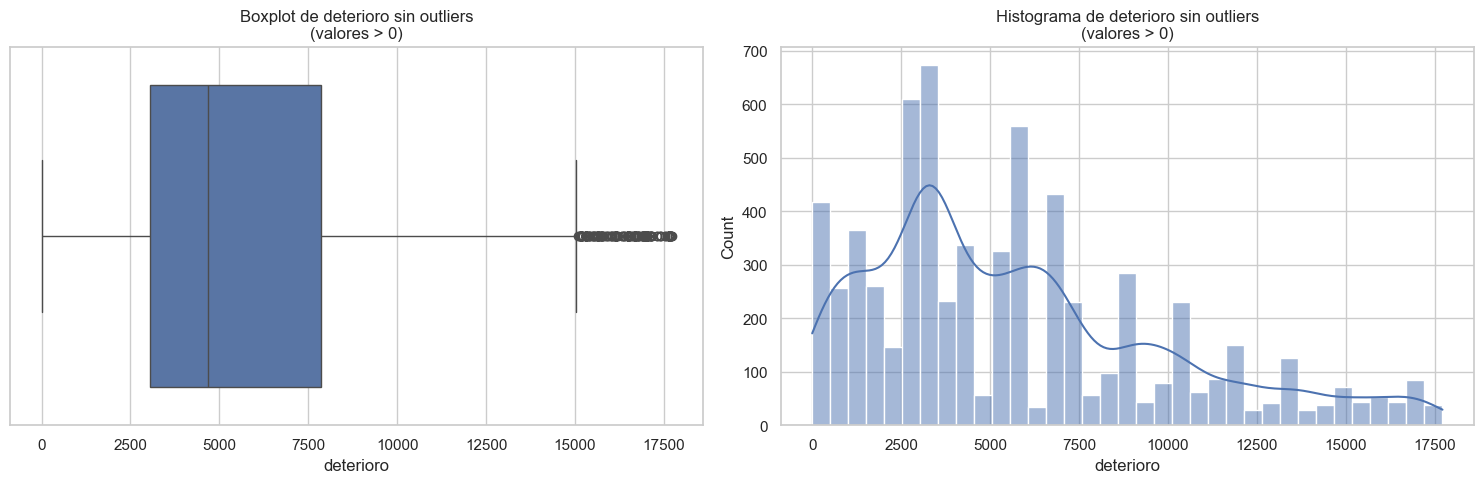

In [10]:
visualizar_distribucion(df_cierres, outliers=False)

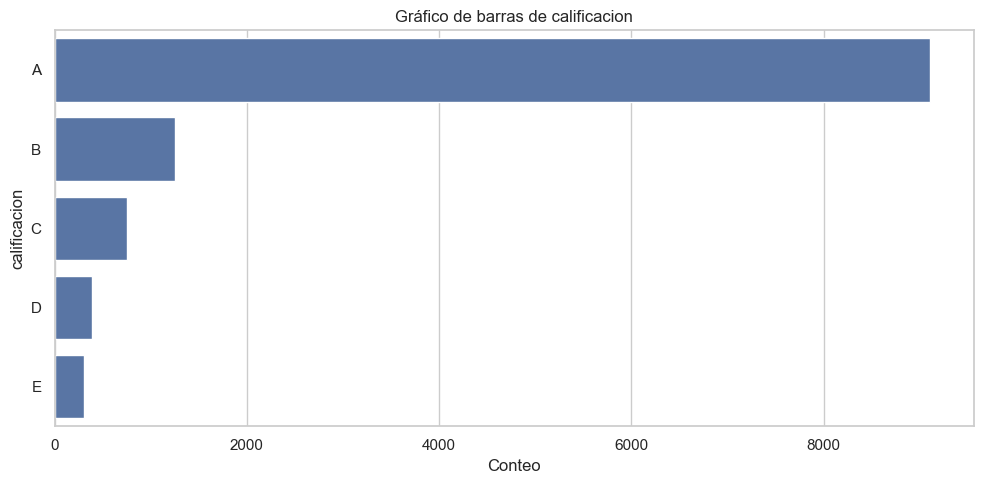

In [11]:
visualizar_categoricas(df_cierres,['calificacion'])

## Creación de features

In [ ]:
# Calcular dias_pago
df_facturas_2['dias_pago'] = (df_facturas_2['Fecha_pago'] - df_facturas_2['Fecha de vencimiento']).dt.days

# Función para rellenar los valores faltantes
def fill_dias_pago(row):
	if pd.isna(row['dias_pago']):
		today = pd.Timestamp('30-06-2025')
		if today < row['Fecha de vencimiento']:
			return 0
		else:
			return (today - row['Fecha de vencimiento']).days
	else:
		return row['dias_pago']

df_facturas_2['dias_pago'] = df_facturas_2.apply(fill_dias_pago, axis=1)
df_facturas_2

In [ ]:
def calificación(row):
    if row['dias_pago'] < 30:
        return 'A'
    elif 30 <= row['dias_pago'] <= 90:
        return 'B'
    elif 91 <= row['dias_pago'] <= 180:
        return 'C'
    elif 181 <= row['dias_pago'] <= 360:
        return 'D'
    else:
        return 'E'
    
df_facturas_2['calificación'] = df_facturas_2.apply(calificación, axis=1)